In [1]:
import numpy as np
rng = np.random.default_rng(0)
n, p = 200, 10
X = rng.standard_normal((n, p))
Y = rng.standard_normal(n)

In [2]:
from glmnet import GaussNet
L = GaussNet()
L.fit(X, Y)


GaussNet(lambda_values=None, lambda_fractional=True, alpha=1.0, lower_limits=array([-9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35,
       -9.9e+35, -9.9e+35, -9.9e+35, -9.9e+35]), upper_limits=array([9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35, 9.9e+35,
       9.9e+35, 9.9e+35, 9.9e+35]), penalty_factor=array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]]), fit_intercept=True, standardize=True, family=GLMFamilySpec(base=<statsmodels.genmod.families.family.Gaussian object at 0x1038636d0>), control=GLMNetControl(thresh=1e-07, maxit=100000, big=9.9e+35, logging=False, mxitnr=25, epsnr=1e-06, fdev=1e-05), regularized_estimator=<class 'glmnet.regularized_glm.RegGLM'>, lambda_min_ratio=0.0001, nlambda=100, df_max=11, type_gaussian='covariance')

In [3]:
import rpy2
%load_ext rpy2.ipython
%R -i X,Y

In [4]:
X[0]

array([ 0.12573022, -0.13210486,  0.64042265,  0.10490012, -0.53566937,
        0.36159505,  1.30400005,  0.94708096, -0.70373524, -1.26542147])


Call:  glmnet(x = X, y = Y) 

   Df %Dev    Lambda
1   0 0.00 0.0142600
2   1 0.69 0.0129900
3   1 1.26 0.0118400
4   1 1.74 0.0107800
5   1 2.13 0.0098270
6   1 2.46 0.0089540
7   2 3.01 0.0081580
8   2 3.50 0.0074340
9   2 3.91 0.0067730
10  2 4.24 0.0061710
11  2 4.52 0.0056230
12  4 4.84 0.0051240
13  5 5.27 0.0046680
14  5 5.65 0.0042540
15  6 5.98 0.0038760
16  6 6.32 0.0035320
17  7 6.62 0.0032180
18  7 6.89 0.0029320
19  8 7.14 0.0026710
20  8 7.36 0.0024340
21  9 7.57 0.0022180
22  9 7.77 0.0020210
23  9 7.94 0.0018410
24  9 8.07 0.0016780
25 10 8.19 0.0015290
26 10 8.30 0.0013930
27 10 8.39 0.0012690
28 10 8.46 0.0011560
29 10 8.52 0.0010540
30 10 8.57 0.0009601
31 10 8.62 0.0008748
32 10 8.65 0.0007971
33 10 8.68 0.0007263
34 10 8.70 0.0006617
35 10 8.72 0.0006030
36 10 8.74 0.0005494
37 10 8.76 0.0005006
38 10 8.77 0.0004561
39 10 8.78 0.0004156
40 10 8.78 0.0003787
41 10 8.79 0.0003450
42 10 8.80 0.0003144
43 10 8.80 0.0002865
44 10 8.80 0.0002610
45 10 8.81 0.0002378
46 

Loading required package: Matrix
Loaded glmnet 4.1-8


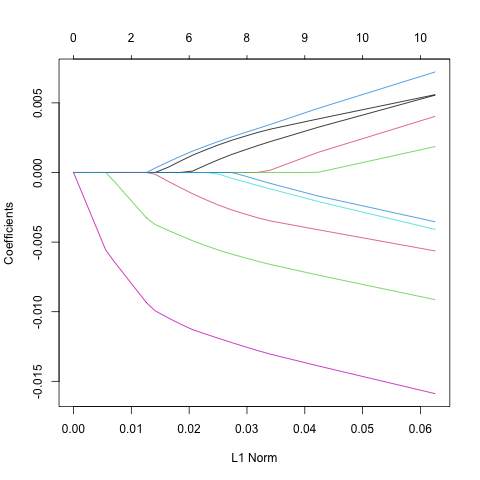

In [5]:
%%R
library(glmnet)
G = glmnet(X, Y)
plot(G)
G

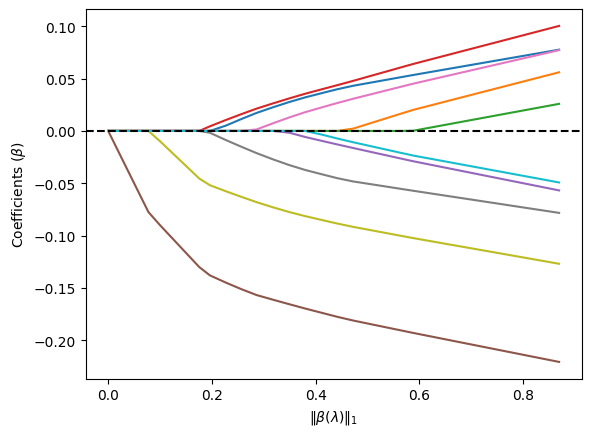

In [6]:
ax = L.plot_coefficients(xvar='norm')

In [7]:
L.summary_

,Degrees of Freedom,Fraction Deviance Explained
lambda,,
9.729035e+35,0,0.000000
1.805376e-01,1,0.006902
1.644991e-01,1,0.012632
1.498855e-01,1,0.017389
1.365700e-01,1,0.021339
...,...,...
7.459834e-04,10,0.088222
6.797123e-04,10,0.088223
6.193286e-04,10,0.088224


In [8]:
%%R -o C_R,I_R
C_R = as.matrix(coef(G))[-1,]
I_R = as.matrix(coef(G))[1,]

In [9]:
np.linalg.norm(C_R.T - L.coefs_) / np.linalg.norm(L.coefs_)

0.9280467503820297

In [10]:
np.linalg.norm(I_R - L.intercepts_) / np.linalg.norm(L.intercepts_)

0.9750697214719649

In [11]:
L.coefs_.shape

(65, 10)